In [22]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

In [24]:
print(type(train_data))
print(type(train_labels))
print(type(test_data))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [25]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [26]:
print(train_data[0:5])

[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.91430e+02
  1.46500e+01]]


In [27]:
print(train_labels[0:5])

[15.2 42.3 50.  21.1 17.7]


In [28]:
order = np.random.randint(0,404,size=404)
train_data = train_data[order]
train_labels = train_labels[order]


In [29]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std


In [30]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df = pd.DataFrame(train_data,columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.241522,-0.441868,0.960450,-0.262265,1.269218,0.166733,0.765555,-0.638329,1.654058,1.517334,0.818419,0.308812,0.531138
1,0.437395,-0.441868,0.960450,3.812933,0.575244,1.257836,0.976886,-1.228374,1.654058,1.517334,0.818419,0.387326,-1.451697
2,-0.377543,-0.441868,-0.754267,-0.262265,-0.474181,1.776831,0.016629,0.262479,-0.175482,-0.619353,-0.510220,0.364990,-1.206441
3,-0.440417,-0.441868,-1.156289,-0.262265,-0.626517,0.348836,-0.187287,-0.271841,-0.861559,-0.839569,-0.320414,0.388793,-0.641104
4,-0.411366,-0.441868,-0.221120,-0.262265,-0.161046,-0.249070,0.713650,-0.402574,-0.632867,-0.637208,-0.035706,0.435270,-0.237886


In [31]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(13,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

In [32]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mae'])

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=20)

In [34]:
history = model.fit(train_data,train_labels,batch_size=32,epochs=500,validation_split=0.2,callbacks=[early_stop])

Epoch 1/500
11/11 [==============================] - 0s 8ms/step - loss: 510.3318 - mae: 21.0192 - val_loss: 476.4509 - val_mae: 19.8696
Epoch 2/500
11/11 [==============================] - 0s 1ms/step - loss: 469.0966 - mae: 20.0334 - val_loss: 430.4621 - val_mae: 18.7300
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 416.9868 - mae: 18.8007 - val_loss: 372.9048 - val_mae: 17.2050
Epoch 4/500
11/11 [==============================] - 0s 1ms/step - loss: 351.0899 - mae: 17.1124 - val_loss: 299.6221 - val_mae: 15.0990
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 269.4030 - mae: 14.7273 - val_loss: 215.0798 - val_mae: 12.3531
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 179.0388 - mae: 11.6805 - val_loss: 137.0416 - val_mae: 9.1432
Epoch 7/500
11/11 [==============================] - 0s 1ms/step - loss: 105.2681 - mae: 8.4001 - val_loss: 90.1064 - val_mae: 7.0907
Epoch 8/500
11/11 [==========================

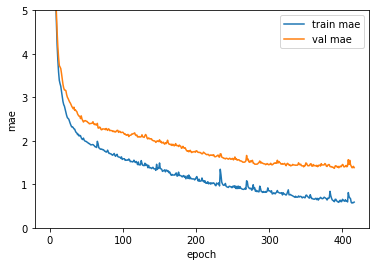

In [35]:
plt.plot(history.history['mae'],label='train mae')
plt.plot(history.history['val_mae'],label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(loc='best')

plt.ylim([0,5])
plt.show()

In [43]:
test_loss,test_mae = model.evaluate(test_data,test_labels)
print('loss: {:.3f}\nmae: {:.3f}'.format(test_loss,test_mae))

4/4 [==============================] - 0s 667us/step - loss: 19.6202 - mae: 2.7319
loss: 19.620
mae: 2.732


In [44]:
print('前10筆測試標籤:',np.round(test_labels[0:10]))
test_predictions = model.predict(test_data[0:10]).flatten()
print('前10筆預測標籤:',np.round(test_predictions))


前10筆測試標籤: [ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
前10筆預測標籤: [ 8. 18. 22. 39. 25. 22. 27. 23. 20. 20.]
